<a href="https://colab.research.google.com/github/tlsgptj/CJONs/blob/tkwjs/%EB%8B%A8%EC%96%B4%EC%82%AC%EC%A0%84%EC%9C%BC%EB%A1%9C_%EB%A0%88%EC%9D%B4%EB%B8%94_%EB%8B%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

# 필요한 라이브러리 불러오기
import pandas as pd
import urllib.request

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.9 MB/s eta 0:00:00


#1.0 ㄲ

In [ ]:
# read_csv() 함수를 사용해 csv파일 읽기

df1 = pd.read_csv('/content/1. Piccini Memoro Rosso N.V._cleaning.csv')
# df2 = pd.read_csv('/content/2. Elk Cove Estate Pinot Noir_cleaning.csv')
# df3 = pd.read_csv('/content/3. Bodega Norton Malbec D.O.C._cleaning.csv')
# df4 = pd.read_csv('/content/4. Antinori Villa Antinori Chianti Classico Riserva_cleaning.csv')
# df5 = pd.read_csv('/content/5. Mascota Vineyards Unánime Gran Vino Tinto_cleaning.csv')
# df6 = pd.read_csv('/content/6. Gran Passione Rosso Veneto_cleaning.csv')
# df7 = pd.read_csv('/content/7. Imperial Rioja Reserva_cleaning.csv')
# df8 = pd.read_csv('/content/8. The Federalist Cabernet Sauvignon_cleaning.csv')
# df9 = pd.read_csv('/content/9. Decoy California Red Wine_cleaning.csv')
# df10 = pd.read_csv('/content/10. Beaulieu Vineyard (BV) Napa Valley Cabernet Sauvignon_cleaning.csv')
# df11 = pd.read_csv('/content/11. Masseria La Volpe 1 Uno Primitivo di Manduria_cleaning.csv')
# df12 = pd.read_csv('/content/12. Perez Cruz Carmenère Limited Edition_cleaning.csv')
# df13 = pd.read_csv('/content/13. Paraduxx Proprietary Red_cleaning.csv')
# df14 = pd.read_csv('/content/14. Tinazzi Tenuta Valleselle Ripa Magna Corvina_cleaning.csv')
# df15 = pd.read_csv("/content/15. Gentleman's Collection Cabernet Sauvignon (Batch No. 1 & 3)_cleaning.csv")
# df16 = pd.read_csv('/content/16. Umberto Cesari Liano Sangiovese - Cabernet Sauvignon_cleaning.csv')
# df17 = pd.read_csv("/content/Port 1. W. & J. Graham's 10 Year Old Tawny Port N.V._cleaning.csv")
# df18 = pd.read_csv("/content/White 1. Cloudy Bay Sauvinon Blanc_cleaning.csv")
# df19 = pd.read_csv("/content/White 2. Craggy Range Marlborrough Sauvinon Blanc_cleaning.csv")



# test 데이터

# df_test = pd.read_csv('/content/test.csv')

# df1 = pd.read_csv('/content/Torre Oria Knock Knock Red Blend.csv', encoding='cp949')
# df2 = pd.read_csv('/content/Château Pibran Pauillac.csv', encoding='cp949')
# df3 = pd.read_csv('/content/Domain Road Vineyard Pinot Noir 2020.csv', encoding='cp949')
# df4 = pd.read_csv('/content/Dominus Dominus (Christian Moueix).csv', encoding='cp949')
# df5 = pd.read_csv('/content/Duckhorn Three Palms Vineyard Merlot.csv', encoding='cp949')
# df6 = pd.read_csv('/content/Mysterious Diggings Pinot Noir 2022.csv', encoding='cp949')
# df7 = pd.read_csv('/content/River Run Pinot Noir 2021.csv', encoding='cp949')
# df8 = pd.read_csv('/content/Rutherford Hill Merlot.csv', encoding='cp949')
# df9 = pd.read_csv('/content/Sea Smoke Southing Pinot Noir.csv', encoding='cp949')
# df10 = pd.read_csv('/content/Weinert Carrascal 2002.csv', encoding='cp949')


# dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]
# dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
dfs = [df1]

In [ ]:
df1.shape, #df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape, df10.shape #데이터 사이즈 확인

(780, 2)

# 1.1. 결측치 제거

In [ ]:
df1.isnull().sum()

Unnamed: 0    0
Score         0
Review        0
Rating        0
dtype: int64

In [ ]:
df1 = df1[~df1['Review'].isnull()]

# 1.2. 데이터셋에서 영어만 추출

In [ ]:
!pip install git+https://github.com/Artemis1111/lingua-py.git

  Cloning https://github.com/Artemis1111/lingua-py.git to /tmp/pip-req-build-lhrjaz8w
  Running command git clone --filter=blob:none --quiet https://github.com/Artemis1111/lingua-py.git /tmp/pip-req-build-lhrjaz8w
  Resolved https://github.com/Artemis1111/lingua-py.git to commit f76c1d3d3fad87e3154d64fa75f03d92ce4463cd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH, Language.RUSSIAN, Language.CHINESE, Language.JAPANESE, Language.KOREAN, Language.PORTUGUESE, Language.ITALIAN]
detector = LanguageDetectorBuilder.from_languages(*languages).build()
detector.detect_language_of("languages are awesome")

Language.ENGLISH

In [ ]:
def non_eng_remove(df, review_str):
  review_revised = []
  for review in df[review_str]:
    if detector.detect_language_of(review) != Language.ENGLISH:
      review = None
    review_revised.append(review)
  return review_revised

In [ ]:
dfs_num = len(dfs)

In [ ]:
for i in range(dfs_num):
  ans_review = []
  for review in dfs[i]['Review']:
    ans_review.append(str(review))
  dfs[i]["Review"] = ans_review

In [ ]:
# for i in range(dfs_num):
#   dfs[i]['Review'] = non_eng_remove(dfs[i], 'Review')
df1["Review"] = non_eng_remove(df1, 'Review')

In [ ]:
df1 = df1[~df1['Review'].isnull()]
# df2 = df2[~df2['Review'].isnull()]
# df3 = df3[~df3['Review'].isnull()]
# df4 = df4[~df4['Review'].isnull()]
# df5 = df5[~df5['Review'].isnull()]
# df6 = df6[~df6['Review'].isnull()]
# df7 = df7[~df7['Review'].isnull()]
# df8 = df8[~df8['Review'].isnull()]
# df9 = df9[~df9['Review'].isnull()]
# df10 = df10[~df10['Review'].isnull()]

In [ ]:
df1.isnull().sum()
  #보고싶으면 직접 하나하나 입력해보세요

Review    0
Rating    0
dtype: int64

In [ ]:
df1.shape#, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape, df10.shape, # df11.shape, df12.shape, df13.shape, df14.shape, df15.shape, df16.shape, df17.shape, df18.shape, df19.shape

(168, 2)

non_eng_remove 완성본 저장하기

In [ ]:

df1.to_csv('Torre Oria Knock Knock Red Blend_cleaning.csv')
# df2.to_csv('Château Pibran Pauillac_cleaning.csv')
# df3.to_csv('Domain Road Vineyard Pinot Noir 2020_cleaning.csv')
# df4.to_csv('Dominus Dominus (Christian Moueix)_cleaning.csv')
# df5.to_csv('Duckhorn Three Palms Vineyard Merlot_cleaning.csv')
# df6.to_csv('Mysterious Diggings Pinot Noir 202_cleaning2.csv')
# df7.to_csv('River Run Pinot Noir 2021_cleaning.csv')
# df8.to_csv('Rutherford Hill Merlot_cleaning.csv')
# df9.to_csv('Sea Smoke Southing Pinot Noir_cleaning.csv')
# df10.to_csv('Weinert Carrascal 2002_cleaning.csv')


# 1.3. chat gpt 사용하기

dry review, sweet review 모아보기

In [ ]:
import re

# 단어 분류 기준

flavor_dict_sweet_dry = {"dry": "Dry", "astringent": "Dry", "lean": "Dry", "crisp": "Dry", "tart": "Dry",
               "off-dry": "Dry", "bone-dry": "Dry", "stony": "Dry", "dusty": "Dry", "dried": "Dry", "dryness": "Dry",
               "sweet": "Sweet", "sweetness": "Sweet", "sugary": "Sweet", "sweetish": "Sweet",
               "honeyed": "Sweet", "luscious": "Sweet", "nectar-like": "Sweet", "sweety": "Sweet", "desert": "Sweet"
}
flavor_dict_tannin_smooth = {
    "astringency": "Tannins", "austere": "Tannins", "bitterness": "Tannins",
    "hard": "Tannins", "harsh": "Tannins", "tannins": "Tannins", "tannin": "Tannins",
    "structured": "Tannins", "grippy": "Tannins","tannic": "Tannins", "smooth": "Smooth",
    "silky": "Smooth", "velvety": "Smooth", "elegant": "Smooth",
    "round": "Smooth", "supple": "Smooth", "luscious": "Smooth",
    "balanced": "Smooth"
}
flavor_dict_acidic_soft = {
    "tart": "Acidic", "crisp": "Acidic", "zesty": "Acidic", "vinegary": "Acidic",
    "lively": "Acidic", "bright": "Acidic", "tangy": "Acidic", 'acid': "Acidic",
    "grippy": "Acidic", "hard": "Acidic", "acidic": "Acidic", 'acidity': "Acidic",
    "harsh": "Acidic" , "austere": "Acidic","sour":"Acidic","pungent":"Acidic","acidulous":"Acidic",

    "silky": "Soft", "supple": "Soft", "velvety": "Soft",
    "elegant": "Soft", "round": "Soft", "luscious": "Soft",
    "balanced": "Soft","softness":"Soft", "soft": "Soft",
    "softly": "Soft", "soften": "Soft", "softness": "Soft", "softy": "Soft",
}
flavor_dict_Light_Bold = {
    "full-bodied": "Bold", "bodied": "Bold", "robust": "Bold", "bold": "Bold", "rich": "Bold",
    "full-flavored": "Bold", "intense": "Bold", "weighty": "Bold", "concentrated": "Bold", "weight": "Bold", "boldness": "Bold",

    "light": "Light", "light-bodied": "Light", "ethereal": "Light", "delicate": "Light",
    "luscious": "Light", "unburdened": "Light", "lighty": "Light", "feathery": "Light",
    "airy": "Light", "mild": "Light", "graceful": "Light", "easygoing": "Light"
}


#Austere, Hard ,Harsh :탄닌, 산도

def classify_flavor_Sweet_Dry(text): #@@@@@@@     Sweet_Dry
    # -를 띄어쓰기로 바꾸는 코드
    text.replace("-", " ")

    #소문자로 바꾸고 쪼개기
    words = text.lower().split()

    #문장 속 문장부호 지우기
    for i in range(len(words)):
      words[i] = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_\`{|}~\\\\]','', str(words[i]))

    flavor_count_S_D = {"Dry": 0, "Sweet": 0}

    for word in words:
        if word in flavor_dict_sweet_dry:
            flavor = flavor_dict_sweet_dry[word]
            flavor_count_S_D[flavor] += 1

    if flavor_count_S_D["Dry"] > flavor_count_S_D["Sweet"]:
        return "Dry"
    elif flavor_count_S_D["Sweet"] > flavor_count_S_D["Dry"]:
        return "Sweet"
    else:
        return "Unknown"


def classify_flavor_Tannin_smooth(text):  #@@@@@@@     Tannin_smooth
    # -를 띄어쓰기로 바꾸는 코드
    text.replace("-", " ")

    #소문자로 바꾸고 쪼개기
    words = text.lower().split()

    #문장 속 문장부호 지우기
    for i in range(len(words)):
      words[i] = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_\`{|}~\\\\]','', str(words[i]))

    flavor_count_T_S = {"Tannins": 0, "Smooth": 0}

    for word in words:
        if word in flavor_dict_tannin_smooth:
            flavor = flavor_dict_tannin_smooth[word]
            flavor_count_T_S[flavor] += 1

    if flavor_count_T_S["Tannins"] > flavor_count_T_S["Smooth"]:
        return "Tannins"
    elif flavor_count_T_S["Smooth"] > flavor_count_T_S["Tannins"]:
        return "Smooth"
    else:
        return "Unknown"

#def classify_flavor_Acidic_Soft(text):  #@@@@@@@     Acidic_Soft
    # -를 띄어쓰기로 바꾸는 코드
    text.replace("-", " ")

    #소문자로 바꾸고 쪼개기
    words = text.lower().split()

    #문장 속 문장부호 지우기
    for i in range(len(words)):
      words[i] = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_\`{|}~\\\\]','', str(words[i]))

    flavor_count_A_S = {"Acidic": 0, "Soft": 0}
    for word in words:
        if word in flavor_dict_acidic_soft:
            flavor = flavor_dict_acidic_soft[word]
            flavor_count_A_S[flavor] += 1

    if flavor_count_A_S["Acidic"] > flavor_count_A_S["Soft"]:
        return "Acidic"
    elif flavor_count_A_S["Soft"] > flavor_count_A_S["Acidic"]:
        return "Soft"
    else:
        return "Unknown"

def classify_flavor_Light_Bold(text):  #@@@@@@@     Light_Bold
    # -를 띄어쓰기로 바꾸는 코드
    text.replace("-", " ")

    #소문자로 바꾸고 쪼개기
    words = text.lower().split()

    #문장 속 문장부호 지우기
    for i in range(len(words)):
      words[i] = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_\`{|}~\\\\]','', str(words[i]))

    flavor_count_A_S = {"Light": 0, "Bold": 0}
    for word in words:
        if word in flavor_dict_Light_Bold:
            flavor = flavor_dict_Light_Bold[word]
            flavor_count_A_S[flavor] += 1

    if flavor_count_A_S["Light"] > flavor_count_A_S["Bold"]:
        return "Light"
    elif flavor_count_A_S["Bold"] > flavor_count_A_S["Light"]:
        return "Bold"
    else:
        return "Unknown"

# 1.3.1 단맛

In [ ]:
# 분류된 문장들을 저장할 리스트
dry_reviews = []
sweet_reviews = []
unknown1_reviews = []

# 리뷰 데이터들
for df in dfs:
  reviews = df["Review"]

  for review in reviews:
    # 리뷰 데이터에서 문장 부분만 추출
    flavor_class = classify_flavor_Sweet_Dry(review)

    # Dry와 Sweet으로 분류된 문장들을 각각의 리스트에 추가
    if flavor_class == "Dry":
      dry_reviews.append(review)
    elif flavor_class == "Sweet":
      sweet_reviews.append(review)
    elif flavor_class == "Unknown":
      unknown1_reviews.append(review)

# # 분류 결과 출력
# print("Dry Reviews!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!:")
# for review in dry_reviews:
#     print(review)#("\n" + "-"*100 + '\n', review)

# print("\n"*10)

# print("\nSweet Reviews!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!:")
# for review in sweet_reviews:
#     print(review)#("\n" + "-"*100 + '\n', review)

# print("\n"*10)

# print("\nUnknown Reviews!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!:")
# for review in unknown_reviews:
#     print(review)#("\n" + "-"*100 + '\n', review)

# 1.3.2 쓴맛

In [ ]:
# 분류된 문장들을 저장할 리스트
Tannin_reviews = []
smooth_reviews = []
unknown2_reviews = []

# 리뷰 데이터들
for df in dfs:
  reviews = df["Review"]

  for review in reviews:
    # 리뷰 데이터에서 문장 부분만 추출
    flavor_class = classify_flavor_Tannin_smooth(review)

    #  Tannin와 smooth으로 분류된 문장들을 각각의 리스트에 추가
    if flavor_class == "Tannins":
       Tannin_reviews.append(review)
    elif flavor_class == "Smooth":
      smooth_reviews.append(review)
    elif flavor_class == "Unknown":
      unknown2_reviews.append(review)

# # 분류 결과 출력
# print(" Tannins Reviews:")
# for review in  Tannin_reviews:
#     print("\n" + "-"*100 + '\n', review)

# print("\n"*10)

# print("\nSmooth Reviews:")
# for review in smooth_reviews:
#     print("\n" + "-"*100 + '\n', review)

# print("\n"*10)

# print("\nUnknown Reviews:")
# for review in unknown_reviews:
#     print("\n" + "-"*100 + '\n', review)

# 1.3.3 신맛

In [ ]:
# 분류된 문장들을 저장할 리스트
Acidic_reviews = []
Soft_reviews = []
unknown3_reviews = []

# 리뷰 데이터들
for df in dfs:
  reviews = df["Review"]

  for review in reviews:
    # 리뷰 데이터에서 문장 부분만 추출
    flavor_class = classify_flavor_Acidic_Soft(review)

    #  Acidic와 Soft으로 분류된 문장들을 각각의 리스트에 추가
    if flavor_class == "Acidic":
       Acidic_reviews.append(review)
    elif flavor_class == "Soft":
      Soft_reviews.append(review)
    elif flavor_class == "Unknown":
      unknown3_reviews.append(review)

# # 분류 결과 출력
# print(" Acidic Reviews:")
# for review in  Acidic_reviews:
#     print("\n" + "-"*100 + '\n', review)

# print("\n"*10)

# print("\nSoft Reviews:")
# for review in Soft_reviews:
#     print("\n" + "-"*100 + '\n', review)

# print("\n"*10)

# print("\nUnknown Reviews:")
# for review in unknown_reviews:
#     print("\n" + "-"*100 + '\n', review)

NameError: ignored

# 1.3.4 바디감

In [ ]:
# 분류된 문장들을 저장할 리스트
Light_reviews = []
Bold_reviews = []
unknown4_reviews = []

# 리뷰 데이터들
for df in dfs:
  reviews = df["Review"]

  for review in reviews:
    # 리뷰 데이터에서 문장 부분만 추출
    flavor_class = classify_flavor_Light_Bold(review)

    #  Light와 Bold으로 분류된 문장들을 각각의 리스트에 추가
    if flavor_class == "Light":
        Light_reviews.append(review)
    elif flavor_class == "Bold":
        Bold_reviews.append(review)
    elif flavor_class == "Unknown":
        unknown4_reviews.append(review)

# 1.3.5 맛 별로 분석하기

flavor1과 flavor2가 무엇을 의미하는지 입력해 주세요

In [ ]:
import random

# unknown = unknown1_reviews
# flavor1 = sweet_reviews         # select1
# flavor2 = dry_reviews

# unknown = unknown2_reviews
# flavor1 = Tannin_reviews        # select2
# flavor2 = smooth_reviews

# unknown = unknown3_reviews
# flavor1 = Acidic_reviews        # select3
# flavor2 = Soft_reviews

unknown = unknown4_reviews
flavor1 = Light_reviews        # select4
flavor2 = Bold_reviews

print("unknown: ", len(unknown))
print("flavor1: ", len(flavor1))
print("flavor2: ", len(flavor2))

unknown:  357
flavor1:  34
flavor2:  96


In [ ]:
data = [unknown, flavor1, flavor2]

review_num = min(len(unknown), len(flavor1), len(flavor2))

# 각각 가장 작은 값 골라내기
for i in range(3):
  data[i] = random.sample(data[i], review_num)

# pandas 형태로 라벨 붙이기

unknown_dic = pd.Series(data[0], index=[0]*review_num)
flavor1_dic = pd.Series(data[1], index=[1]*review_num)
flavor2_dic = pd.Series(data[2], index=[2]*review_num)

combined_dic = pd.concat([unknown_dic , flavor1_dic , flavor2_dic])

In [ ]:
print(combined_dic)

0    3.9 is fair. \nBlack cherry smooth tannins and...
0    Was down to ?7 in Sainsbury’s, buy this occasi...
0                         Great value for a tasty wine
0    Great catch, found it at Rewe in Germany. Fres...
0    Well balanced, enough deep colour, deep comple...
                           ...                        
2    Another pleasant wine to drink, smooth fruity ...
2    Ruby red colour, medium bodied. On nose, rich ...
2    A medium to full bodied wine with rich aromati...
2    A gorgeous blended red from Piccini in the for...
2    My mark: 3.8\nNose: high intense, plum, red be...
Length: 102, dtype: object


In [ ]:
# csv로 추출하기
combined_dic.to_csv('combined_sample_LB.csv')

# 1.3.6. 새로운 부정표현 flavor 합치기

1.3.4와 마찬가지로, 1.3.1~1.3.3 중에서 가장 최근에 실행했던 하나만 인식됩니다.

아래 코드는 새로운 부정표현 리뷰들을 다시 합치기 위한 것 입니다.

In [ ]:
# read_csv() 함수를 사용해 csv파일 읽기

df = pd.read_csv('/content/negative_complited_dry_sweet.csv') # sweet-dry만 이거 필요... 다른 애들은 필요 없음.

# df_flavor1_neg = pd.read_csv('/content/No_Dry_1.csv') # 바꿔줄 때, 숫자를 일치시키기!
# df_flavor2_neg = pd.read_csv('/content/No_sweet_2.csv') # 바꿔줄 때, 숫자를 일치시키기!

df_flavor1_neg = pd.read_csv('/content/No_Smooth_1.csv') # 바꿔줄 때, 숫자를 일치시키기!
df_flavor2_neg = pd.read_csv('/content/No_Tannins_2.csv') # 바꿔줄 때, 숫자를 일치시키기!

# df_flavor1_neg = pd.read_csv('/content/No_Soft_1.csv') # 바꿔줄 때, 숫자를 일치시키기!
# df_flavor2_neg = pd.read_csv('/content/No_Acidic_2.csv') # 바꿔줄 때, 숫자를 일치시키기!

In [ ]:
additional_num = 100 # 추가 부정어 개수

data = [unknown, flavor1, flavor2]

review_num = min(len(unknown), len(flavor1) + additional_num, len(flavor2) + additional_num)

# 새로넣은 지표 결측치 제거
df_flavor1_neg = df_flavor1_neg[~df_flavor1_neg['Review'].isnull()]
df_flavor2_neg = df_flavor2_neg[~df_flavor2_neg['Review'].isnull()]

df_flavor1_neg.shape, df_flavor2_neg.shape

# 원래 csv에 새로운 부정표현들 넣어주기
for review in df_flavor1_neg['Review']:
    flavor1.append(review)
for review in df_flavor2_neg['Review']:
    flavor2.append(review)

# 각각 가장 작은 값 골라내기
for i in range(3):
  data[i] = random.sample(data[i], review_num)

# pandas 형태로 라벨 붙이기

unknown_dic = pd.Series(data[0], index=[0]*review_num)
flavor1_dic = pd.Series(data[1], index=[1]*review_num)
flavor2_dic = pd.Series(data[2], index=[2]*review_num)

combined_dic = pd.concat([unknown_dic , flavor1_dic , flavor2_dic])
df_flavor1_neg.shape, df_flavor2_neg.shape

((100, 1), (100, 1))

In [ ]:
print(combined_dic)

0                                     Drink and smile.
0                              Full bodied, good value
0                         I think\n- need to try again
0          Blackberry  anise coffee leather dark fruit
0                                Full-bodied and bold.
                           ...                        
2    Soft balanced nose with berry, Rose and wood, ...
2    Great summer cab. Nice and round and soft. Ber...
2    Fruity and flourish, good strong taste of grap...
2    Really enjoyed this Chianti! Smooth oak and va...
2    Earthy blackberry very smooth texture. Wonderf...
Length: 5316, dtype: object


In [ ]:
combined_dic.to_csv('df_SA.csv')

# 2.0. 키워드분석 기초작업

In [ ]:
!pip install wordcloud
!pip install transformers

# 필요한 라이브러리 불러오기
import pandas as pd
import urllib.request

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00


In [ ]:
df1 = pd.read_csv('/content/Torre Oria Knock Knock Red Blend_cleaning.csv')
df2 = pd.read_csv('/content/Château Pibran Pauillac_cleaning.csv')
df3 = pd.read_csv('/content/Domain Road Vineyard Pinot Noir 2020_cleaning.csv')
df4 = pd.read_csv('/content/Dominus Dominus (Christian Moueix)_cleaning.csv')
df5 = pd.read_csv('/content/Duckhorn Three Palms Vineyard Merlot_cleaning.csv')
df6 = pd.read_csv('/content/Mysterious Diggings Pinot Noir 2022_cleaning.csv')
df7 = pd.read_csv('/content/River Run Pinot Noir 2021_cleaning.csv')
df8 = pd.read_csv('/content/Rutherford Hill Merlot_cleaning.csv')
df9 = pd.read_csv('/content/Sea Smoke Southing Pinot Noir_cleaning.csv')
df10 = pd.read_csv('/content/Weinert Carrascal 2002_cleaning.csv')
df11 = pd.read_csv('/content/Torre Oria Knock Knock Red Blend_cleaning.csv')

# 2.1. wordcloud 활용하여 리뷰데이터 시각화

In [ ]:
# 1. 필요한 모듈 불러오기
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rc
import re

In [ ]:
# 2. Stopwords 및 특수문자 필터링을 위한 준비

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []



df = df1  #우리가 보고싶은 애를 여기에 입력



# 3. 문장 데이터를 단어화하기
for val in df["Review"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 소문자로 바꾸기
  val = val.lower()

  #문장 속 문장부호 지우기
  val = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_\`{|}~\\\\]','', val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# # wordcloud 써서 시각화
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

# plt.show()

In [ ]:
# 필터링할 추가적인 stopwords들 정의

stopwords_Rose = ['wine', 'good', 'nice', 'nose', 'really', 'first', 'great', 'little',
                  'high', 'easy', 'top', 'color', 'long', 'tasty', 'excellent', 'very', 'notes',
                  'taste', 'colour', 'still', 'one', 'well', 'perfect', 'drink', 'aftertaste',
                  'value'
]
stopwords_name = ['provence'
]

In [ ]:
# 토큰화된 문장확인
tokenized_text[0]

['peat',
 'and',
 'cherry',
 'vanilla',
 'on',
 'the',
 'nose',
 'light',
 'silky',
 'mouthfeel',
 'tastes',
 'just',
 'like',
 'it',
 'smells',
 'not',
 'very',
 'complicated',
 'but',
 'pleasant',
 'non',
 'the',
 'less']

In [ ]:
def filter_stopwords(tokenized_text, stopwords_2, stopword_3):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2 and word not in stopword_3:
        tokenized_filtered.append(word)

  return tokenized_filtered

In [ ]:
len(tokenized_text)

487

In [ ]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_Rose, stopwords_name)

In [ ]:
# 필터링 되었는지 확인
tokenized_filtered[0:10]

['peat',
 'cherry',
 'vanilla',
 'light',
 'silky',
 'mouthfeel',
 'tastes',
 'smells',
 'complicated',
 'pleasant']

In [ ]:
len(tokenized_filtered)

6628

In [ ]:
import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # 많이 나온 순서대로 정렬

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))

  return sorted_dict

In [ ]:
tokenized_dict = word_count(tokenized_filtered)

##wordcloud 보기

In [ ]:
# 가장 상위 20개의 단어 보기
def top_20(tokenized_dict):
  top_20_words = list(tokenized_dict.items())[:100]
  return top_20_words

top_20(tokenized_dict)

[('cherry', 167),
 ('red', 147),
 ('fruit', 110),
 ('oak', 100),
 ('plum', 99),
 ('smooth', 96),
 ('tobacco', 92),
 ('finish', 88),
 ('dark', 80),
 ('tannins', 79),
 ('medium', 71),
 ('vanilla', 70),
 ('black', 63),
 ('coffee', 60),
 ('full', 57),
 ('price', 53),
 ('fruity', 53),
 ('sweet', 52),
 ('bodied', 52),
 ('chocolate', 52),
 ('italian', 47),
 ('dry', 44),
 ('lovely', 44),
 ('acidity', 40),
 ('blend', 40),
 ('body', 39),
 ('balanced', 38),
 ('rich', 37),
 ('light', 35),
 ('soft', 35),
 ('bit', 35),
 ('palate', 34),
 ('blackberry', 34),
 ('fruits', 32),
 ('ruby', 31),
 ('leather', 31),
 ('flavours', 29),
 ('ripe', 29),
 ('bottle', 28),
 ('spices', 28),
 ('flavour', 26),
 ('hint', 25),
 ('hints', 25),
 ('complex', 25),
 ('drinking', 25),
 ('grapes', 24),
 ('cherries', 22),
 ('quite', 21),
 ('will', 21),
 ('dried', 20),
 ('spice', 20),
 ('primitivo', 20),
 ('aromas', 20),
 ('pleasant', 19),
 ('delicious', 19),
 ('10', 19),
 ('deep', 19),
 ('berries', 19),
 ('fig', 18),
 ('nero', 18

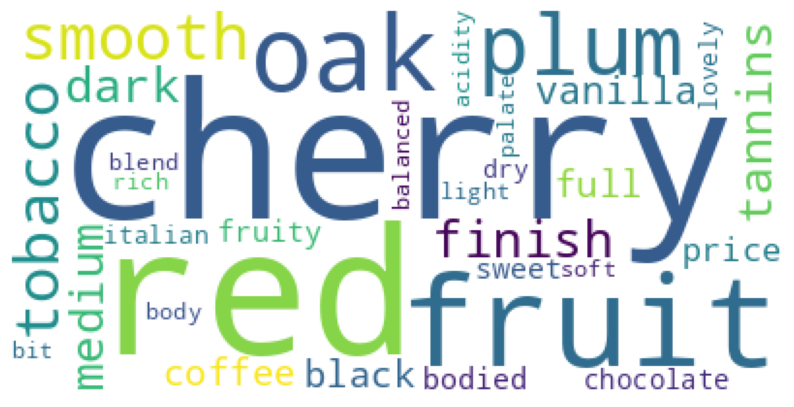

In [ ]:
wc = WordCloud(background_color="white", min_font_size=10)
cloud = wc.generate_from_frequencies(tokenized_dict)


plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# 2.2 키워드 분석하기

In [ ]:
# Dry-Sweet 지표가 잘 나타난 것 구하기

import re

# 단어 분류 기준

flavor_dict_sweet_dry = {"dry": "Dry", "astringent": "Dry", "lean": "Dry", "crisp": "Dry", "tart": "Dry",
               "off-dry": "Dry", "bone-dry": "Dry", "stony": "Dry", "dusty": "Dry", "dried": "Dry", "dryness": "Dry",
               "sweet": "Sweet", "sweetness": "Sweet", "sugary": "Sweet", "sweetish": "Sweet",
               "honeyed": "Sweet", "luscious": "Sweet", "nectar-like": "Sweet", "sweety": "Sweet", "desert": "Sweet"
}
flavor_dict_tannin_smooth = {
    "astringency": "Tannins", "austere": "Tannins", "bitterness": "Tannins",
    "hard": "Tannins", "harsh": "Tannins", "tannins": "Tannins", "tannin": "Tannins",
    "structured": "Tannins", "grippy": "Tannins","tannic": "Tannins", "smooth": "Smooth",
    "silky": "Smooth", "velvety": "Smooth", "elegant": "Smooth",
    "round": "Smooth", "supple": "Smooth", "luscious": "Smooth",
    "balanced": "Smooth"
}
flavor_dict_acidic_soft = {
    "tart": "Acidic", "crisp": "Acidic", "zesty": "Acidic", "vinegary": "Acidic",
    "lively": "Acidic", "bright": "Acidic", "tangy": "Acidic", 'acid': "Acidic",
    "grippy": "Acidic", "hard": "Acidic", "acidic": "Acidic", 'acidity': "Acidic",
    "harsh": "Acidic" , "austere": "Acidic","sour":"Acidic","pungent":"Acidic","acidulous":"Acidic",

    "silky": "Soft", "supple": "Soft", "velvety": "Soft",
    "elegant": "Soft", "round": "Soft", "luscious": "Soft",
    "balanced": "Soft","softness":"Soft", "soft": "Soft",
    "softly": "Soft", "soften": "Soft", "softness": "Soft", "softy": "Soft",
}
flavor_dict_Light_Bold = {
    "full-bodied": "Bold", "bodied": "Bold", "robust": "Bold", "bold": "Bold", "rich": "Bold",
    "full-flavored": "Bold", "intense": "Bold", "weighty": "Bold", "concentrated": "Bold", "weight": "Bold", "boldness": "Bold",

    "light": "Light", "light-bodied": "Light", "ethereal": "Light", "delicate": "Light",
    "luscious": "Light", "unburdened": "Light", "lighty": "Light", "feathery": "Light",
    "airy": "Light", "mild": "Light", "graceful": "Light", "easygoing": "Light"
}

In [ ]:
from collections import defaultdict, OrderedDict

flavors_dict_SWEET = defaultdict(int)
flavors_dict_Tannins = defaultdict(int)
flavors_dict_Acidic = defaultdict(int)
flavors_dict_Light = defaultdict(int)

flavors_list_SWEET = []
flavors_list_Tannins = []
flavors_list_Acidic = []
flavors_list_Light = []

#단맛 키워드 기반 감정분석

for k, v in tokenized_dict.items():
  for key, value in flavor_dict_sweet_dry.items():
    if k == key:
      flavors_list_SWEET.append((value, v))

for k, v in flavors_list_SWEET:
  if k in flavors_dict_SWEET:
    flavors_dict_SWEET[k] += v
  else:
    flavors_dict_SWEET[k] = v

flavors_dict_SWEET = OrderedDict(sorted(flavors_dict_SWEET.items(),
                            key=lambda item: item[1],
                            reverse=True))

print("flavors_dict_SWEET : ", flavors_dict_SWEET)


#쓴맛 키워드 기반 감정분석

for k, v in tokenized_dict.items():
  for key, value in flavor_dict_tannin_smooth.items():
    if k == key:
      flavors_list_Tannins.append((value, v))

for k, v in flavors_list_Tannins:
  if k in flavors_dict_Tannins:
    flavors_dict_Tannins[k] += v
  else:
    flavors_dict_Tannins[k] = v

flavors_dict_Tannins = OrderedDict(sorted(flavors_dict_Tannins.items(),
                            key=lambda item: item[1],
                            reverse=True))

print("flavors_dict_Tannins : ", flavors_dict_Tannins)


#신맛 키워드 기반 분석

for k, v in tokenized_dict.items():
  for key, value in flavor_dict_acidic_soft.items():
    if k == key:
      flavors_list_Acidic.append((value, v))

for k, v in flavors_list_Acidic:
  if k in flavors_dict_Acidic:
    flavors_dict_Acidic[k] += v
  else:
    flavors_dict_Acidic[k] = v

flavors_dict_Acidic = OrderedDict(sorted(flavors_dict_Acidic.items(),
                            key=lambda item: item[1],
                            reverse=True))

print("flavors_dict_Acidic : ", flavors_dict_Acidic)


#바디감 키워드 기반 분석

for k, v in tokenized_dict.items():
  for key, value in flavor_dict_Light_Bold.items():
    if k == key:
      flavors_list_Light.append((value, v))

for k, v in flavors_list_Light:
  if k in flavors_dict_Light:
    flavors_dict_Light[k] += v
  else:
    flavors_dict_Light[k] = v

flavors_dict_Light = OrderedDict(sorted(flavors_dict_Light.items(),
                            key=lambda item: item[1],
                            reverse=True))

print("flavors_dict_Light : ", flavors_dict_Light)

flavors_dict_SWEET :  OrderedDict([('Dry', 71), ('Sweet', 69)])
flavors_dict_Tannins :  OrderedDict([('Smooth', 178), ('Tannins', 104)])
flavors_dict_Acidic :  OrderedDict([('Soft', 118), ('Acidic', 78)])
flavors_dict_Light :  OrderedDict([('Bold', 123), ('Light', 45)])


In [ ]:
# Plotly로 시각화

# Pie Chart
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

flavors = pd.Series(flavors_dict_SWEET)

# 세 개의 플롯을 한 화면에 나타내기
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# 서브플롯 생성
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]])

# Sweet - Dry 플롯
fig1 = px.pie(values=list(flavors_dict_SWEET.values()), names=list(flavors_dict_SWEET.keys()), title='Sweet - Dry')
fig1.update_traces(marker=dict(colors=['Pink', 'skyBlue']))

fig1.show()

# Tannins - Smooth 플롯
fig2 = px.pie(values=list(flavors_dict_Tannins.values()), names=list(flavors_dict_Tannins.keys()), title='Tannins - Smooth')
fig2.update_traces(marker=dict(colors=['red', 'blue']))

fig2.show()

# Acidic - Soft 플롯
fig3 = px.pie(values=list(flavors_dict_Acidic.values()), names=list(flavors_dict_Acidic.keys()), title='Acidic - Soft')
fig3.update_traces(marker=dict(colors=['green', 'Yellow']))

fig3.show()

# Light - Bold 플롯
fig4 = px.pie(values=list(flavors_dict_Light.values()), names=list(flavors_dict_Light.keys()), title='Light - Bold')
fig4.update_traces(marker=dict(colors=['black', 'grey']))

fig4.show()
'''
# 서브플롯 생성
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]])


fig1 = px.pie(flavors, values=flavors, names=flavors.index, title="Sweet - Dry", hover_data=[flavors], labels=flavors.index)
#fig1.update_traces(textposition='inside', textinfo='percent+label')
#fig1.show()

flavors1 = pd.Series(flavors_dict_Tannins)

fig2 = px.pie(flavors1, values=flavors1, names=flavors1.index, title="Taninns - Smooth", hover_data=[flavors1], labels=flavors1.index)
#fig2.update_traces(textposition='inside', textinfo='percent+label')
#fig2.show()

flavors2 = pd.Series(flavors_dict_Acidic)
fig3 = px.pie(flavors2, values=flavors2, names=flavors2.index, title="ACidic - Soft", hover_data=[flavors2], labels=flavors2.index)
#fig3.update_traces(textposition='inside', textinfo='percent+label')
#fig3.show()

fig1.show()
fig2.show()
fig3.show()

'''


'\n# 서브플롯 생성\nfig = make_subplots(rows=1, cols=3, specs=[[{\'type\': \'pie\'}, {\'type\': \'pie\'}, {\'type\': \'pie\'}]])\n\n\nfig1 = px.pie(flavors, values=flavors, names=flavors.index, title="Sweet - Dry", hover_data=[flavors], labels=flavors.index)\n#fig1.update_traces(textposition=\'inside\', textinfo=\'percent+label\')\n#fig1.show()\n\nflavors1 = pd.Series(flavors_dict_Tannins)\n\nfig2 = px.pie(flavors1, values=flavors1, names=flavors1.index, title="Taninns - Smooth", hover_data=[flavors1], labels=flavors1.index)\n#fig2.update_traces(textposition=\'inside\', textinfo=\'percent+label\')\n#fig2.show()\n\nflavors2 = pd.Series(flavors_dict_Acidic)\nfig3 = px.pie(flavors2, values=flavors2, names=flavors2.index, title="ACidic - Soft", hover_data=[flavors2], labels=flavors2.index)\n#fig3.update_traces(textposition=\'inside\', textinfo=\'percent+label\')\n#fig3.show()\n\nfig1.show()\nfig2.show()\nfig3.show()\n\n'

##2. EDA

In [ ]:
df = pd.read_csv('/content/WineDataset.csv')

In [ ]:
df

,WineName,Sweet_ex,Tannins_ex,Acidic_ex,Light_ex,Sweet_bg,Tannins_bg,Acidic_bg,Light_bg,Sweet_all,...,Light_all,Sweet_key,Tannins_key,Acidic_key,Light_key,Sweet_vi,Tannins_vi,Acidic_vi,Light_vi,Tag
0,Torre Oria Knock Knock Red Blend,54,32,61,77,55,13,69,90,55,...,83,46,32,57,68,NaN,NaN,NaN,NaN,NaN
1,Weinert Carrascal 2002,21,47,42,39,23,41,38,34,22,...,38,28,47,58,85,NaN,NaN,NaN,NaN,NaN
2,Bastide Miraflors Vieilles Vignes Syrah - Gren...,23,42,56,49,47,20,43,50,27,...,49,18,48,59,72,NaN,NaN,NaN,NaN,NaN
3,Château Pibran Pauillac,16,52,45,40,22,23,50,47,18,...,42,14,50,55,74,NaN,NaN,NaN,NaN,NaN
4,Domain Road Vineyard Pinot Noir 2020,23,47,62,64,40,21,29,56,28,...,62,31,49,60,51,NaN,NaN,NaN,NaN,NaN
5,Dominus Dominus (Christian Moueix),40,30,24,39,45,27,17,30,40,...,38,44,43,68,78,NaN,NaN,NaN,NaN,NaN
6,Duckhorn Three Palms Vineyard Merlot,33,29,34,40,25,14,35,41,30,...,40,26,33,67,74,NaN,NaN,NaN,NaN,NaN
7,Mysterious Diggings Pinot Noir 2022,24,40,67,69,48,12,60,72,38,...,70,41,41,61,61,NaN,NaN,NaN,NaN,NaN
8,River Run Pinot Noir 2021,39,32,53,78,22,18,54,73,36,...,76,26,37,52,75,NaN,NaN,NaN,NaN,NaN
9,Rutherford Hill Merlot,36,29,54,46,36,15,39,55,36,...,50,25,30,58,65,NaN,NaN,NaN,NaN,NaN
